In [31]:
from sklearn.cluster import AffinityPropagation
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline

In [32]:
dc = pd.read_csv('event.csv')


In [39]:
df = dc.loc[(dc.Date == '4/29/2019') & (dc.Time >= '10:00:00') & (dc.Time <= '12:00:00')]

In [40]:
df

,Date,Time,Count,Status,Sensor,Type,Position,Location,Location Code
8,4/29/2019,10:02:59,1,0,UP,Counter A,4,H2-L3,H2-L3
9,4/29/2019,10:13:59,1,0,UP,Counter A,4,H2-L3,H2-L3
10,4/29/2019,10:17:59,2,0,UP,Counter A,4,H2-L3,H2-L3
11,4/29/2019,10:18:59,1,0,UP,Counter A,4,H2-L3,H2-L3
12,4/29/2019,10:20:59,1,0,UP,Counter A,4,H2-L3,H2-L3
...,...,...,...,...,...,...,...,...,...
23360,4/29/2019,10:30:38,1,0,DOWN,Counter B,5,H1-L5,TOP5N
23361,4/29/2019,10:57:38,1,0,DOWN,Counter B,5,H1-L5,TOP5N
23362,4/29/2019,11:06:38,1,0,DOWN,Counter B,5,H1-L5,TOP5N
23363,4/29/2019,11:45:37,1,0,DOWN,Counter B,5,H1-L5,TOP5N


In [41]:
X= df.loc[df.index,['Position','Count']].to_numpy()


In [42]:
X

array([[4, 1],
       [4, 1],
       [4, 2],
       [4, 1],
       [4, 1],
       [4, 3],
       [4, 1],
       [4, 2],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 3],
       [4, 1],
       [4, 1],
       [4, 2],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 2],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 2],
       [4, 1],
       [4, 2],
       [4, 1],
       [4, 2],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 2],
       [3, 1],
       [3, 1],
       [3, 1],
       [3, 1],
       [3, 1],
       [3, 1],
       [3, 1],
       [3, 1],
       [3, 1],
       [3, 2],
       [3, 2],
       [3, 1],
       [3, 1],
       [3, 1],
       [3, 2],
       [3, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2,

In [43]:
af = AffinityPropagation(preference=-50, damping=.888, max_iter= 100 ).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

C:\Users\neshragh\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


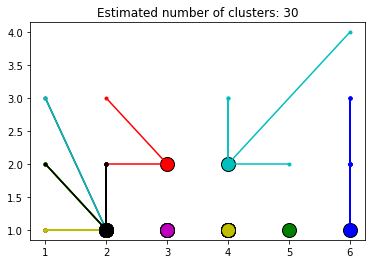

In [44]:
plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [48]:
labels_true = df_data.loc[df_data.index,'Count'].to_numpy()


In [52]:
# from sklearn import metrics

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#      % metrics.adjusted_mutual_info_score(labels_true, labels))